In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv('train.csv')

## Distribution of activities

<ipython-input-20-c29b7c2b9809>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Activity'], palette='viridis')


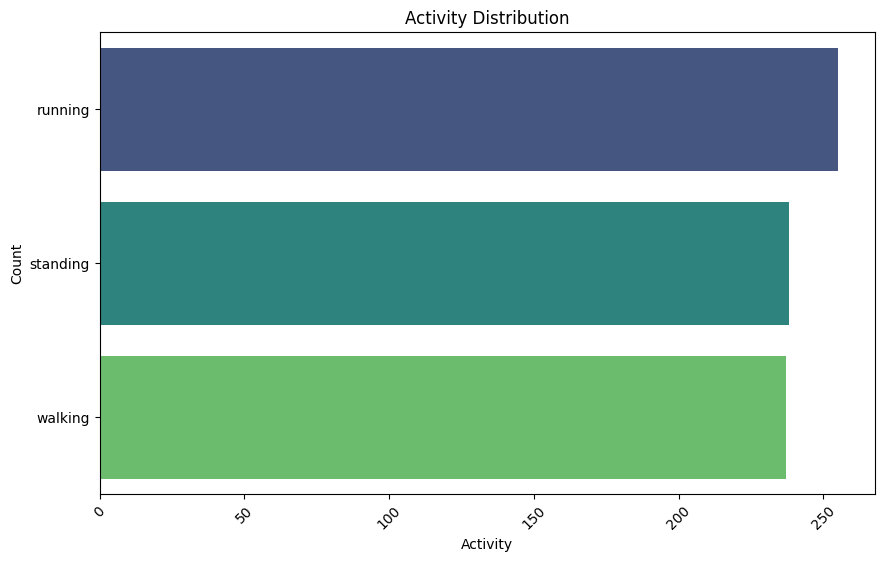

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(df['Activity'], palette='viridis')
plt.title('Activity Distribution')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Distributions for columns

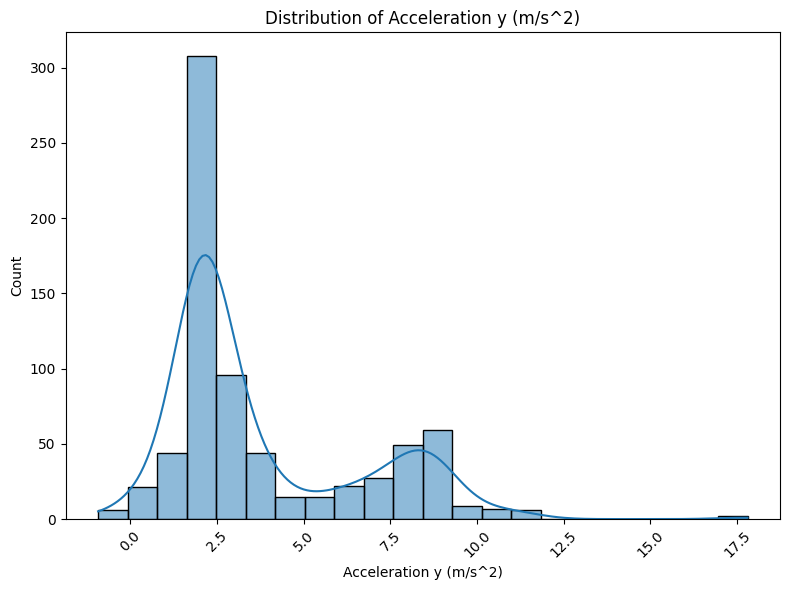

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Acceleration y (m/s^2)', kde=True)
plt.title('Distribution of Acceleration y (m/s^2)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

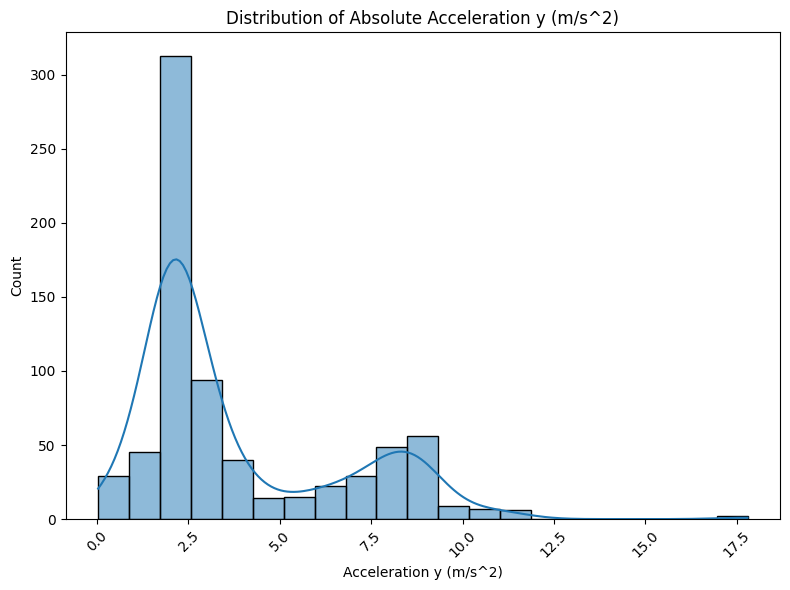

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x=df['Acceleration y (m/s^2)'].abs(), kde=True)
plt.title('Distribution of Absolute Acceleration y (m/s^2)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

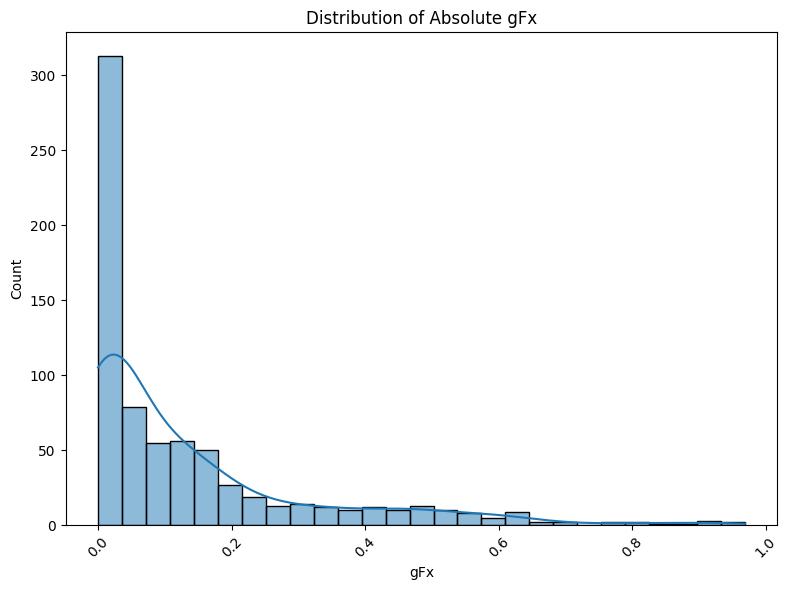

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x=df['gFx'].abs(), kde=True)
plt.title('Distribution of Absolute gFx')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

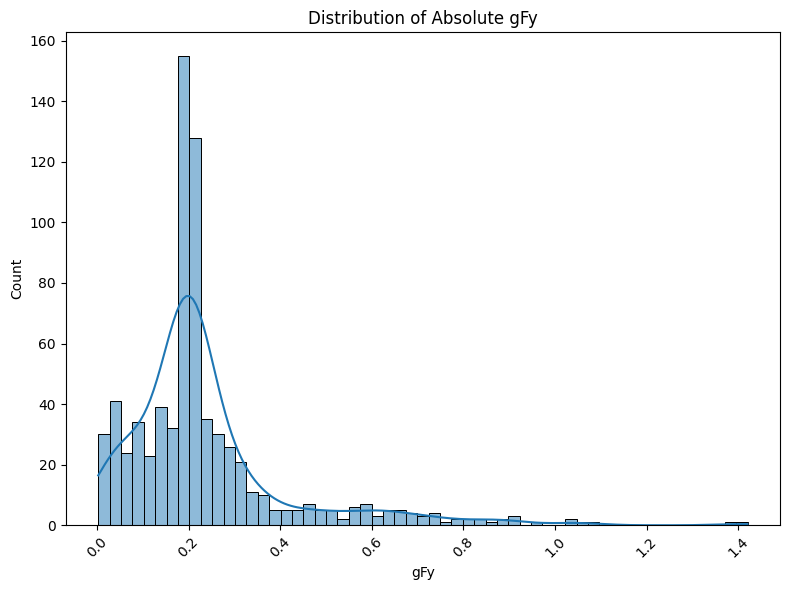

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x=df['gFy'].abs(), kde=True)
plt.title('Distribution of Absolute gFy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Boxplot for columns

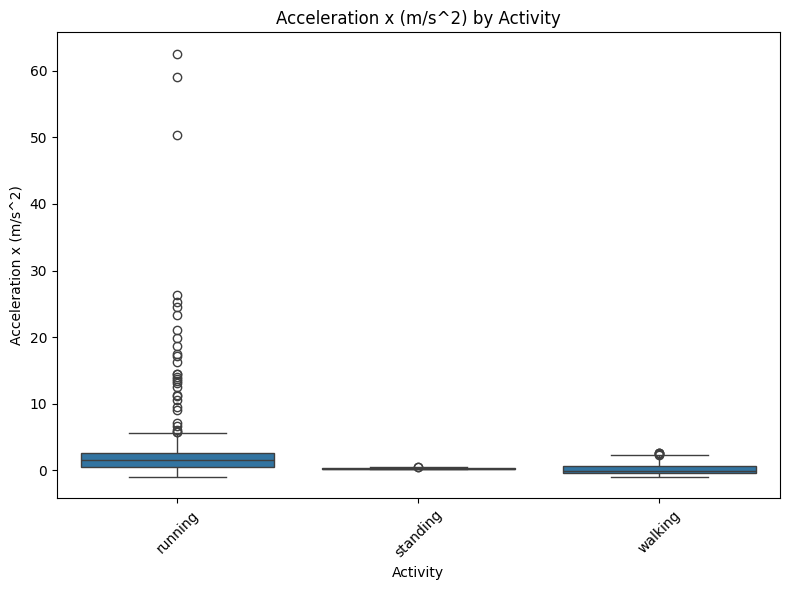

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Activity', y='Acceleration x (m/s^2)')
plt.xticks(rotation=45)
plt.title('Acceleration x (m/s^2) by Activity')
plt.tight_layout()
plt.show()

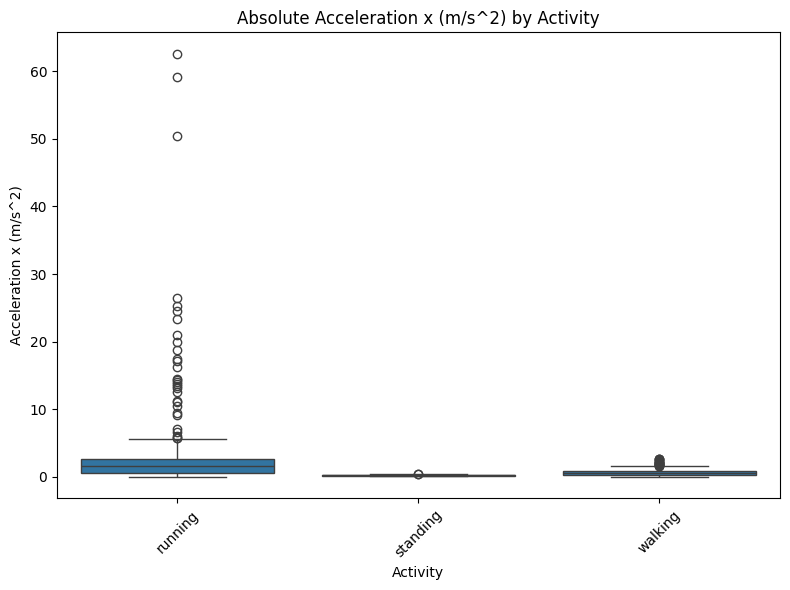

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Activity', y=df['Acceleration x (m/s^2)'].abs())
plt.xticks(rotation=45)
plt.title('Absolute Acceleration x (m/s^2) by Activity')
plt.tight_layout()
plt.show()

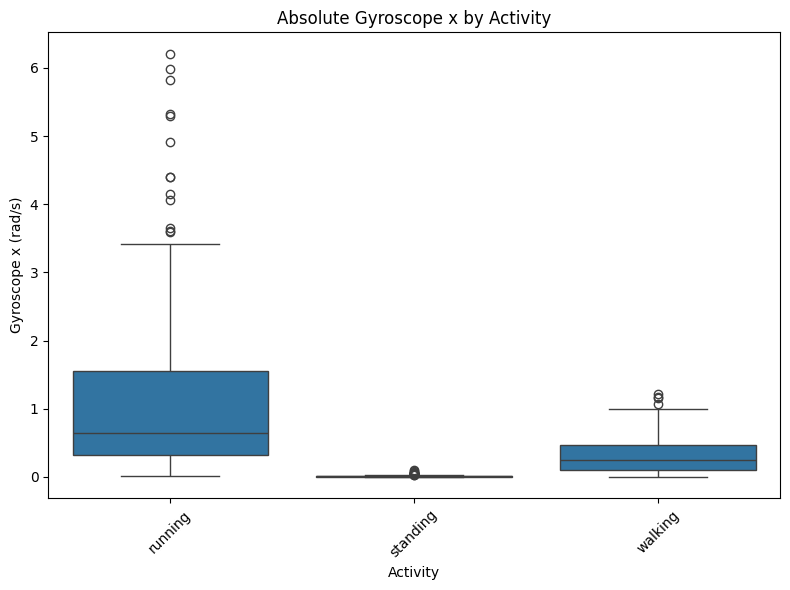

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Activity', y=df['Gyroscope x (rad/s)'].abs())
plt.xticks(rotation=45)
plt.title('Absolute Gyroscope x by Activity')
plt.tight_layout()
plt.show()

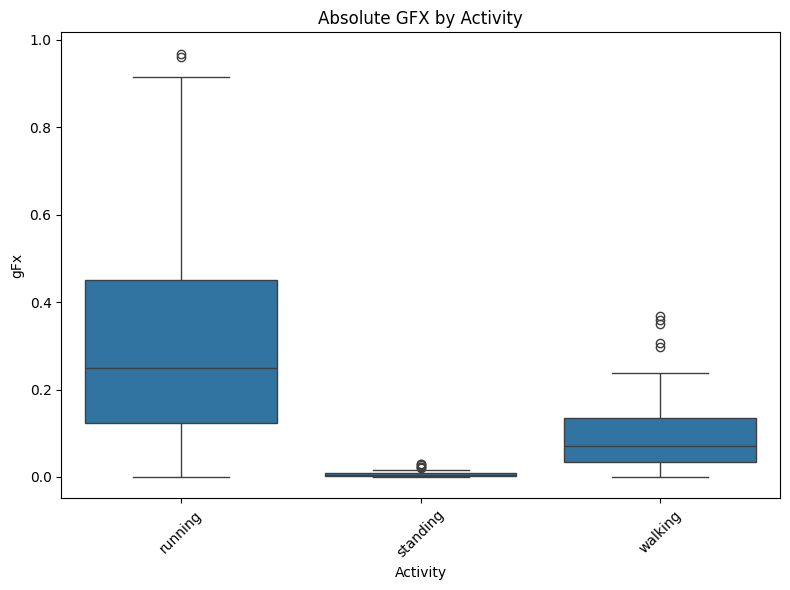

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Activity', y=df['gFx'].abs())
plt.xticks(rotation=45)
plt.title('Absolute GFX by Activity')
plt.tight_layout()
plt.show()

## Acceleration over time

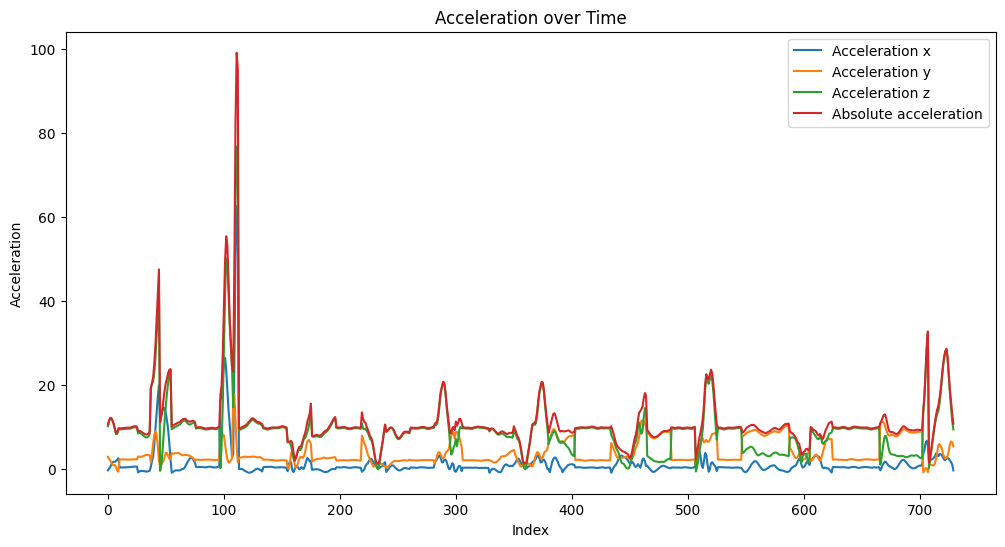

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Acceleration x (m/s^2)'], label='Acceleration x')
plt.plot(df['Acceleration y (m/s^2)'], label='Acceleration y')
plt.plot(df['Acceleration z (m/s^2)'], label='Acceleration z')
plt.plot(df['Absolute acceleration (m/s^2)'], label='Absolute acceleration')
plt.xlabel('Index')
plt.ylabel('Acceleration')
plt.title('Acceleration over Time')
plt.legend()
plt.show()

## Gyroscope over time

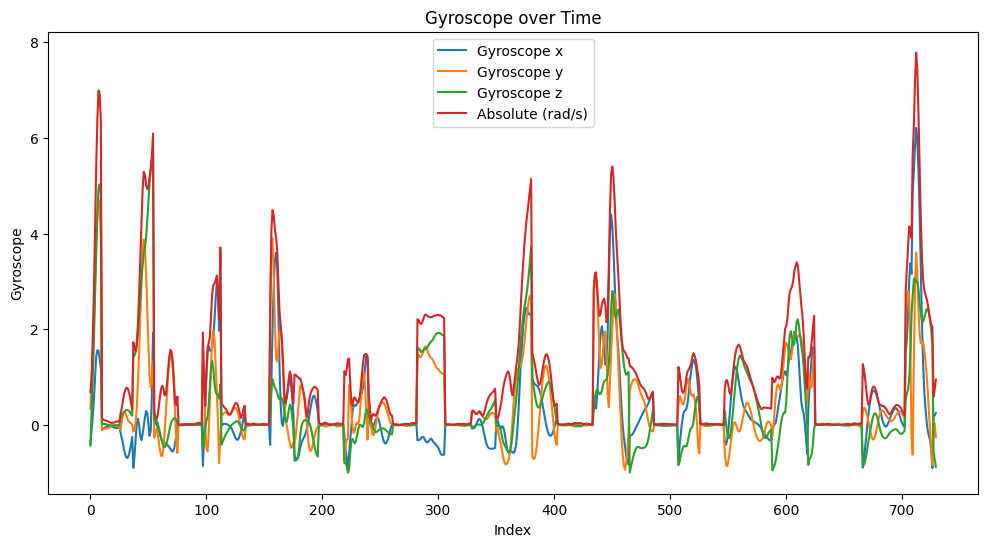

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Gyroscope x (rad/s)'], label='Gyroscope x')
plt.plot(df['Gyroscope y (rad/s)'], label='Gyroscope y')
plt.plot(df['Gyroscope z (rad/s)'], label='Gyroscope z')
plt.plot(df['Absolute (rad/s)'], label='Absolute (rad/s)')
plt.xlabel('Index')
plt.ylabel('Gyroscope')
plt.title('Gyroscope over Time')
plt.legend()
plt.show()

## gFx, gFy, and gFz over time


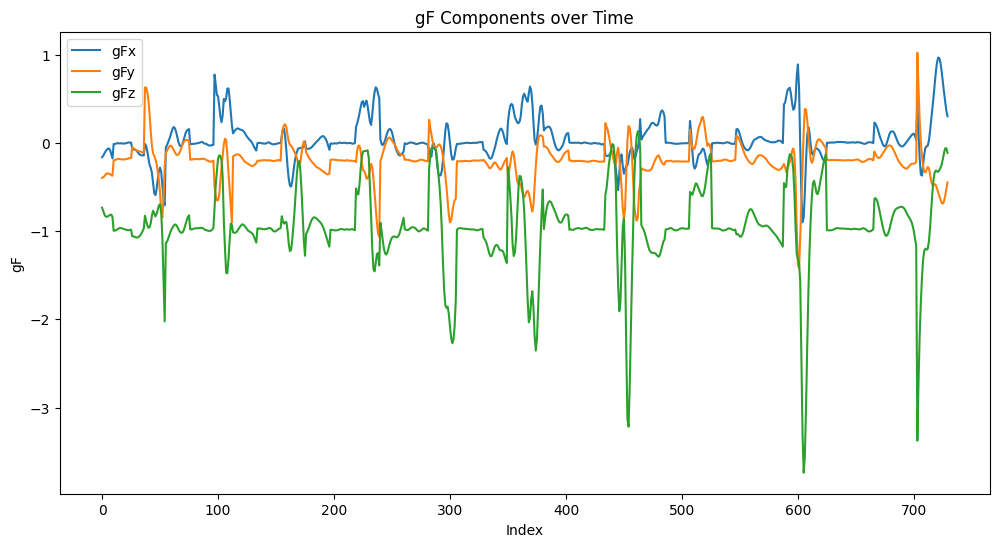

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['gFx'], label='gFx')
plt.plot(df['gFy'], label='gFy')
plt.plot(df['gFz'], label='gFz')
plt.xlabel('Index')
plt.ylabel('gF')
plt.title('gF Components over Time')
plt.legend()
plt.show()

## Relationship between the acceleration components using a scatter plot

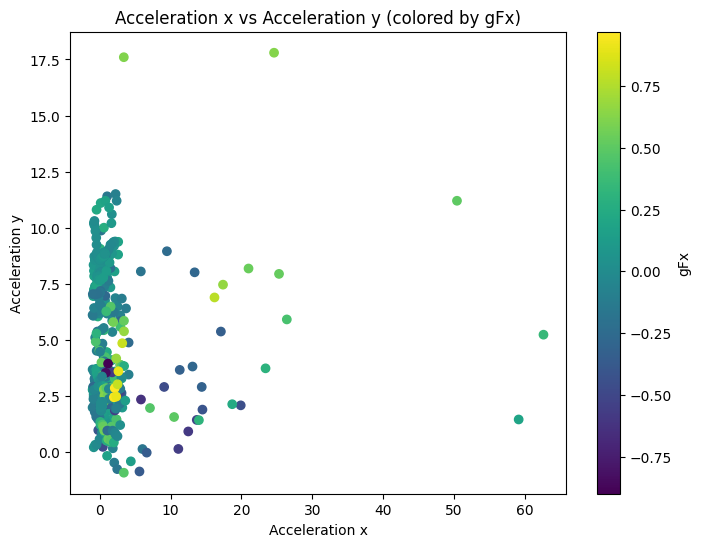

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Acceleration x (m/s^2)'], df['Acceleration y (m/s^2)'], c=df['gFx'], cmap='viridis')
plt.xlabel('Acceleration x')
plt.ylabel('Acceleration y')
plt.title('Acceleration x vs Acceleration y (colored by gFx)')
plt.colorbar(label='gFx')
plt.show()

## Relationship between the gyroscope components using a scatter plot

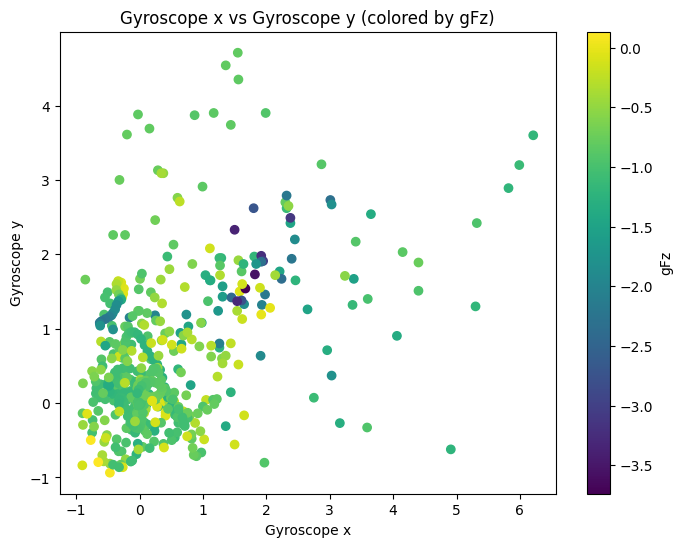

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Gyroscope x (rad/s)'], df['Gyroscope y (rad/s)'], c=df['gFz'], cmap='viridis')
plt.xlabel('Gyroscope x')
plt.ylabel('Gyroscope y')
plt.title('Gyroscope x vs Gyroscope y (colored by gFz)')
plt.colorbar(label='gFz')
plt.show()

## gFTotal and Activity over time

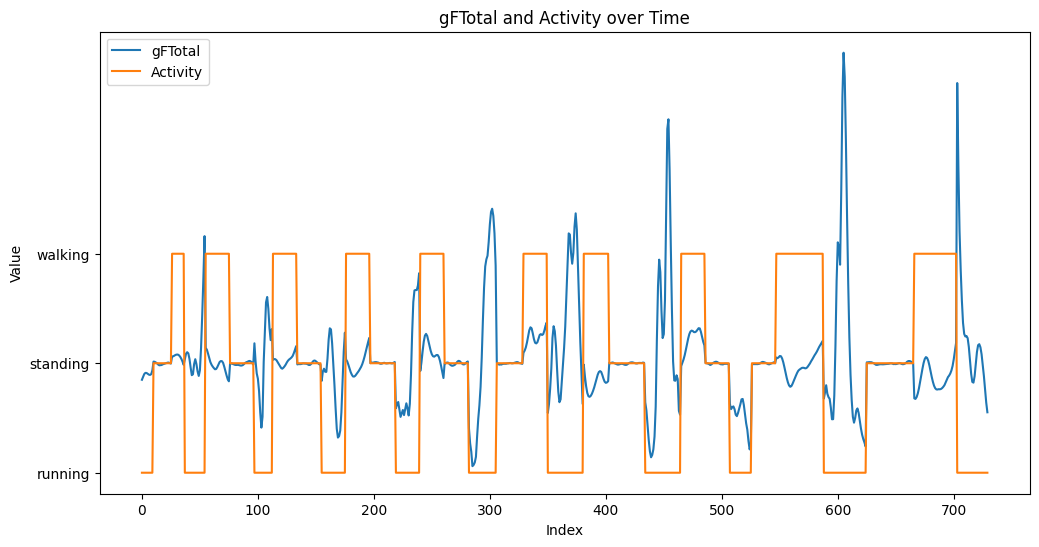

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['gFTotal'], label='gFTotal')
plt.plot(df['Activity'], label='Activity')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('gFTotal and Activity over Time')
plt.legend()
plt.show()

## Relationship between gFTotal and Activity using a scatter plot


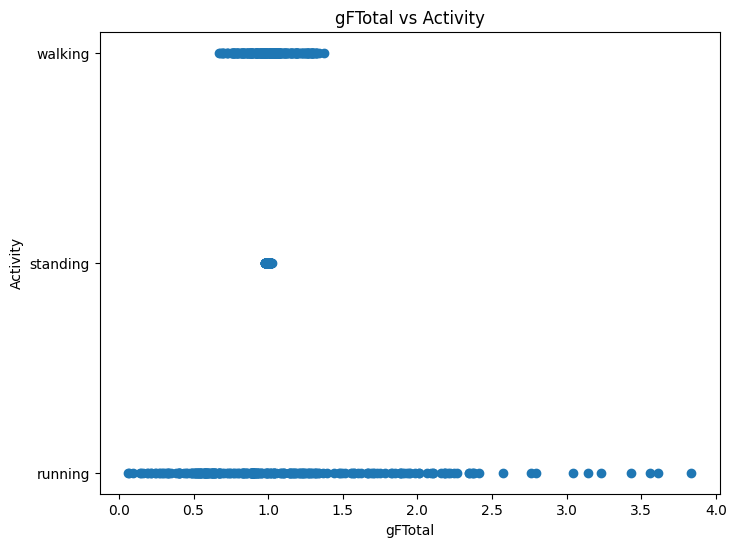

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['gFTotal'], df['Activity'])
plt.xlabel('gFTotal')
plt.ylabel('Activity')
plt.title('gFTotal vs Activity')
plt.show()

## Relationship between the gF components using a scatter plot

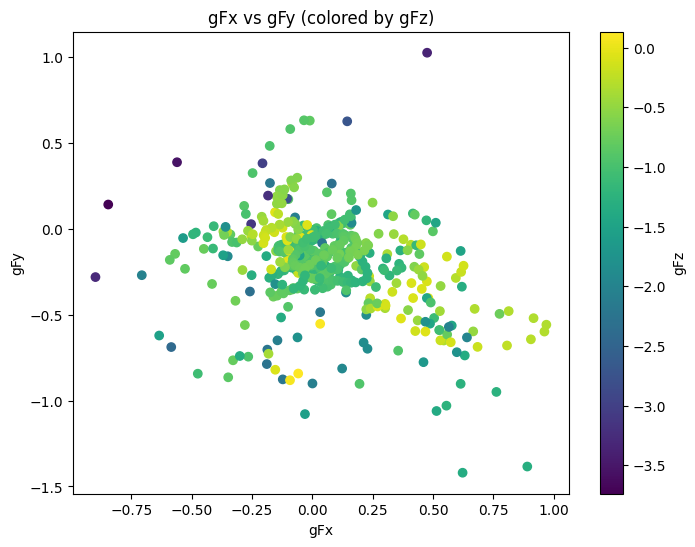

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['gFx'], df['gFy'], c=df['gFz'], cmap='viridis')
plt.xlabel('gFx')
plt.ylabel('gFy')
plt.title('gFx vs gFy (colored by gFz)')
plt.colorbar(label='gFz')
plt.show()

## time-series data for each feature

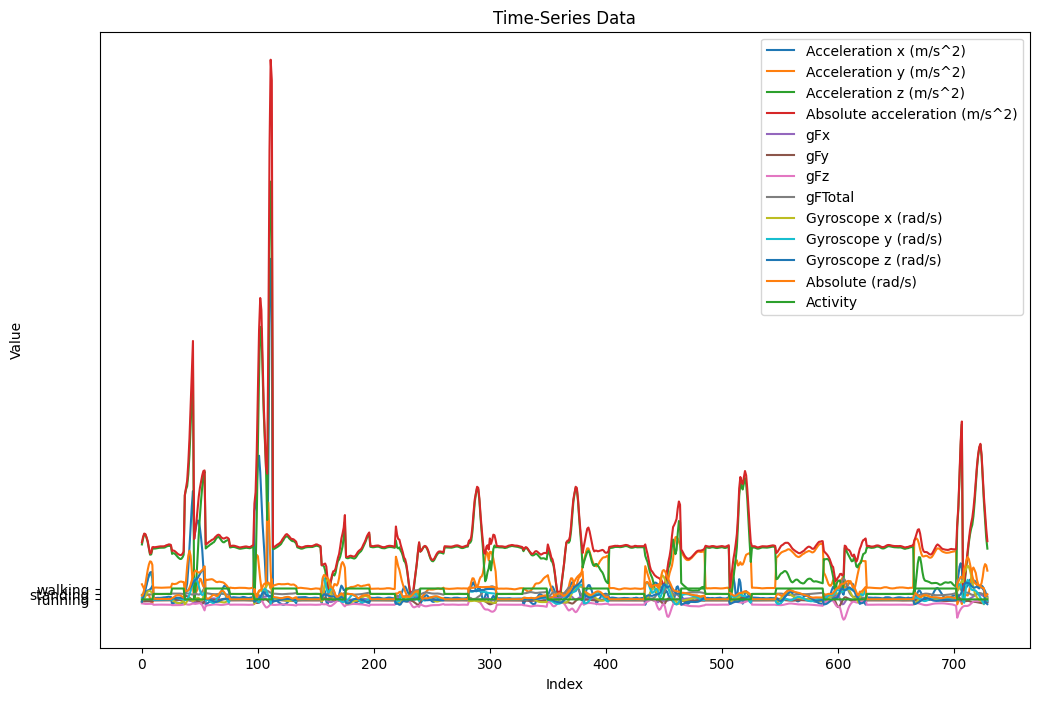

In [ ]:
plt.figure(figsize=(12, 8))
for col in df.columns:
    plt.plot(df[col], label=col)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Time-Series Data')
plt.legend()
plt.show()

## Correlation matrix

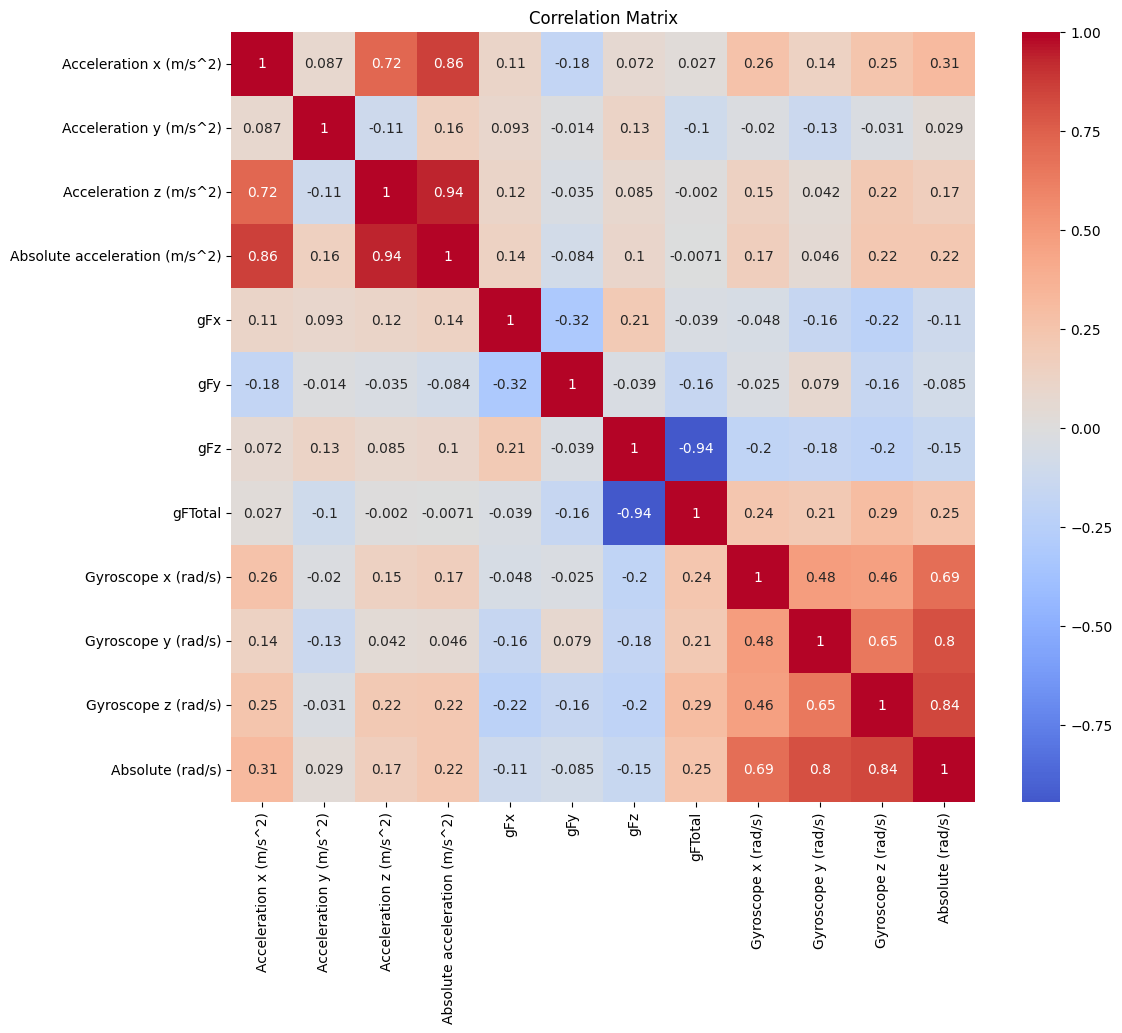

In [ ]:
def plot_correlations(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    correlation_matrix = df[numerical_cols].corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.show()

plot_correlations(df)

## Distributions of numerical columns in a dataset using histograms with Kernel Density Estimation.

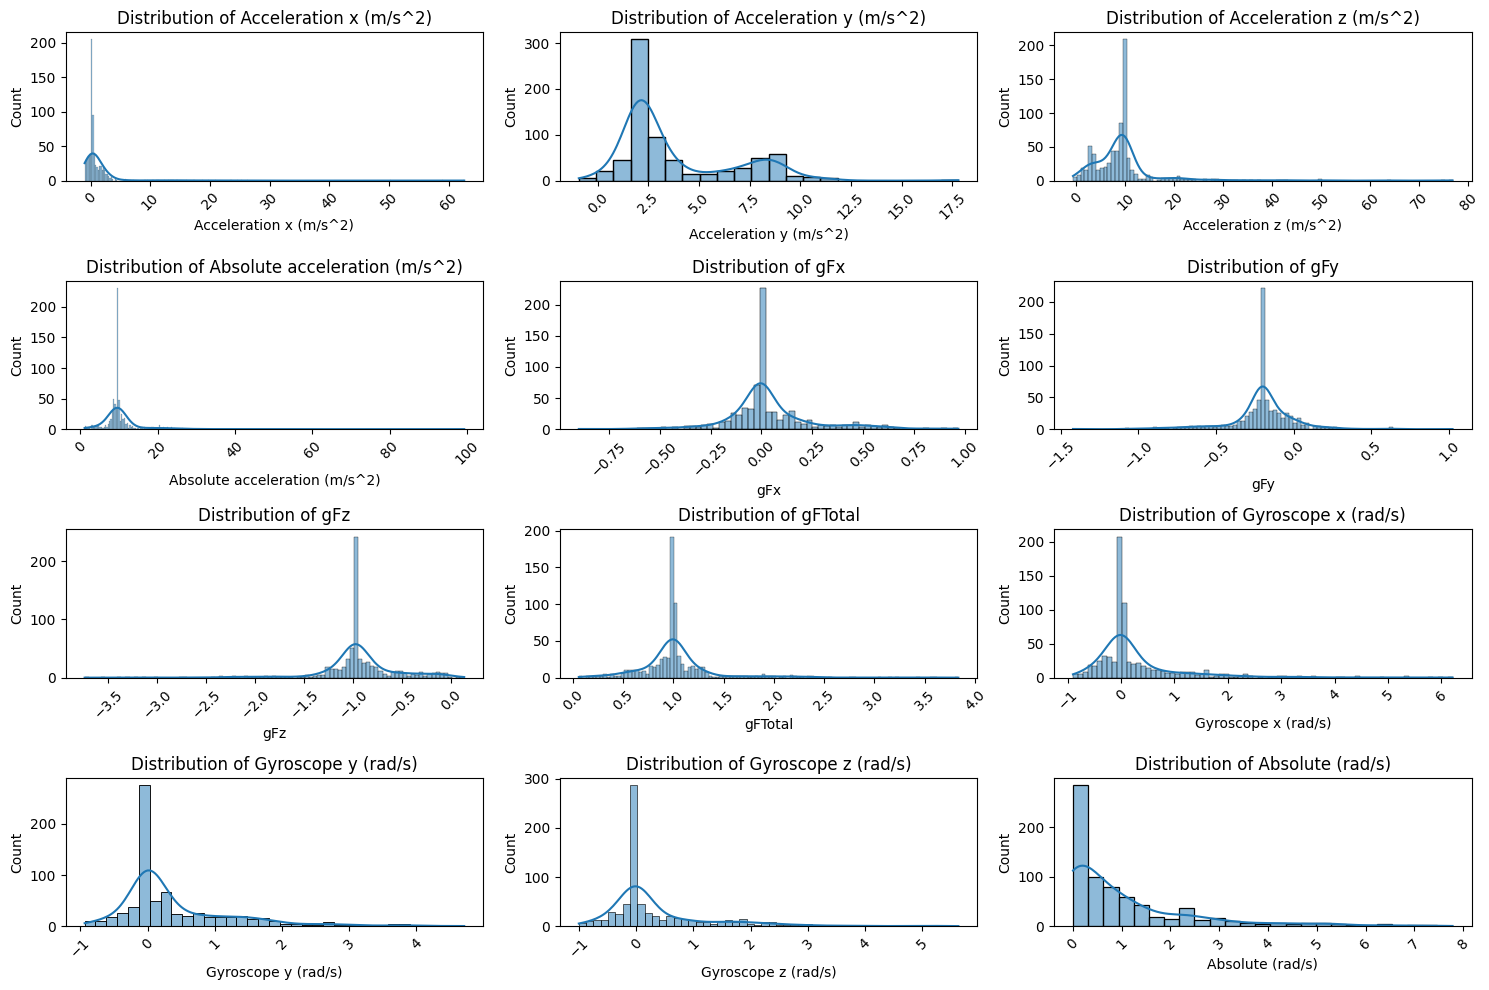

In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## The distribution of numerical features by activity category using boxplots.

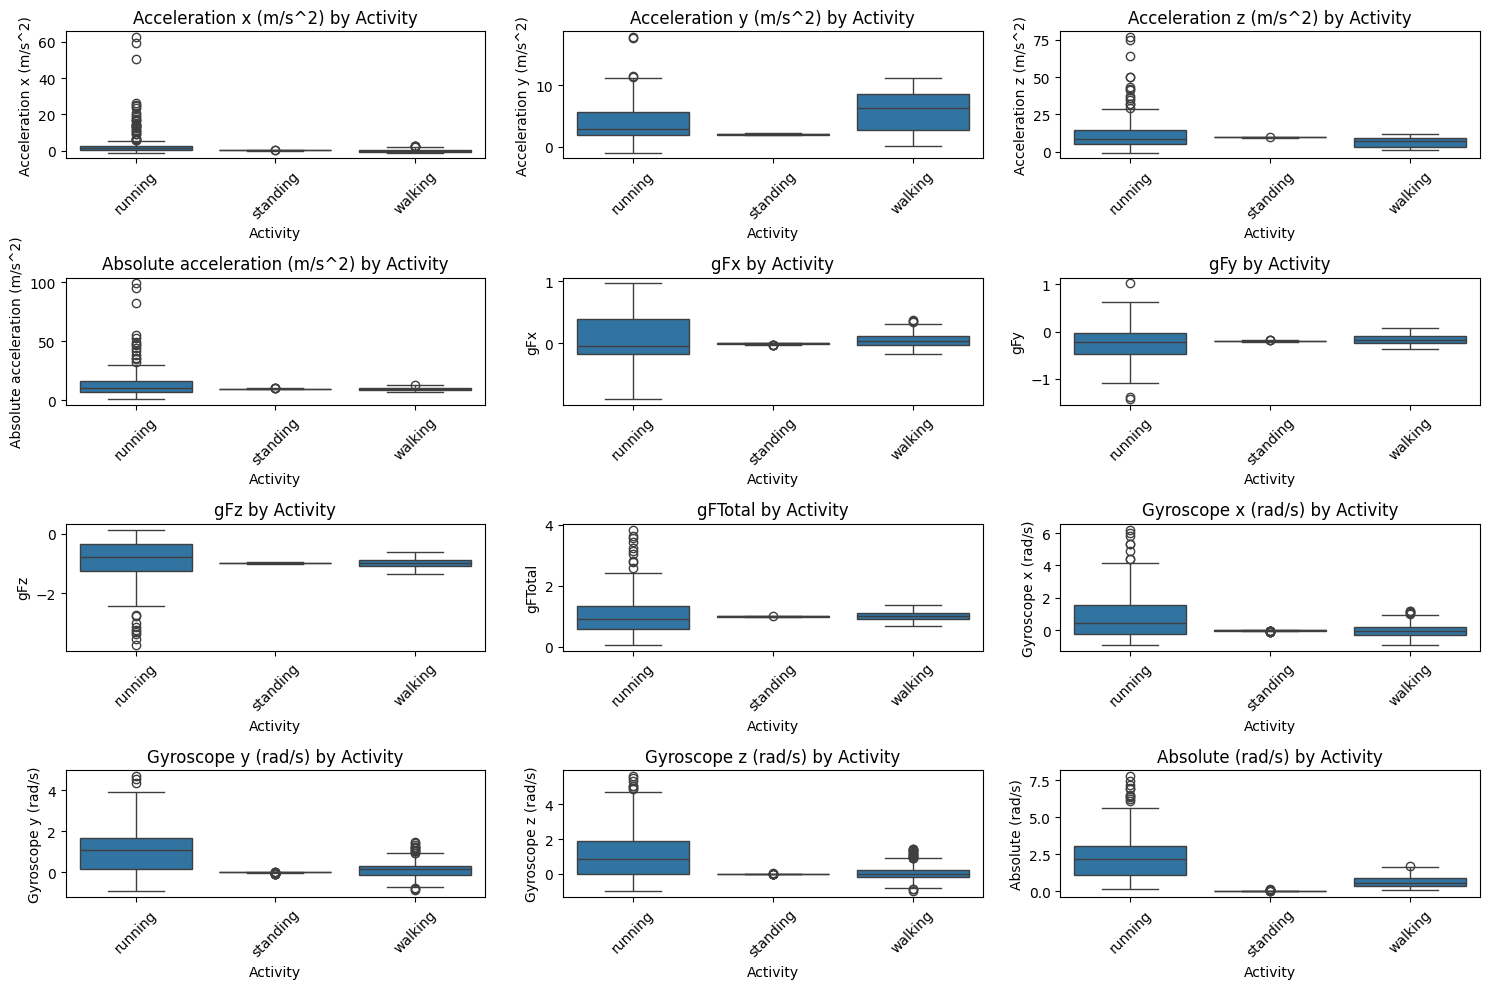

In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[:12], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df, x='Activity', y=col)
    plt.xticks(rotation=45)
    plt.title(f'{col} by Activity')
plt.tight_layout()
plt.show()

## Pairplot to visualize the relationships between acceleration features across different activities

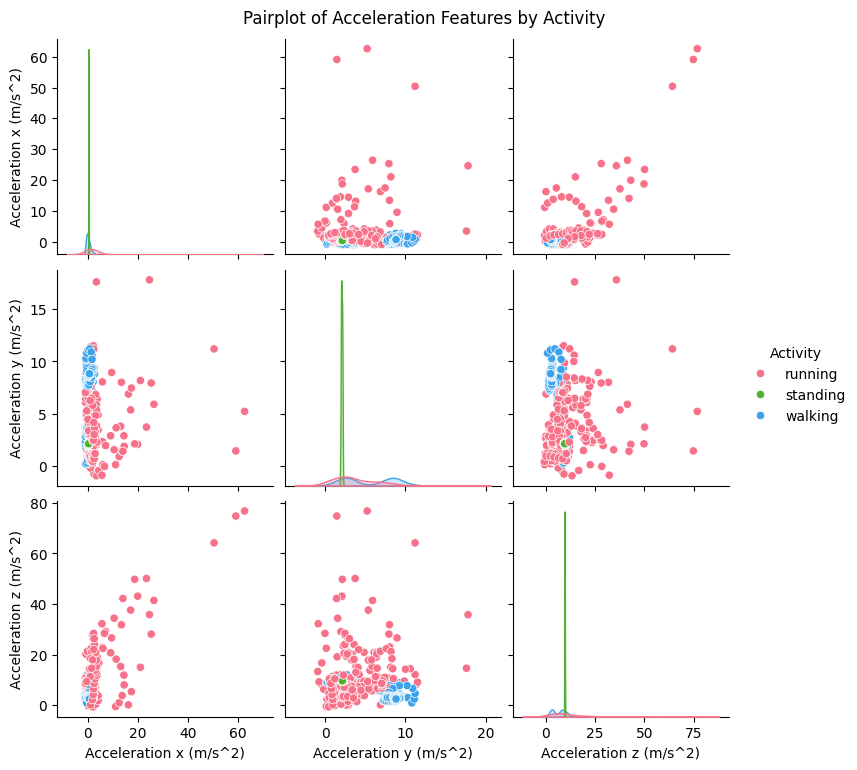

In [ ]:
sns.pairplot(df, vars=["Acceleration x (m/s^2)", "Acceleration y (m/s^2)", "Acceleration z (m/s^2)"], hue="Activity", palette="husl", diag_kind="kde")
plt.suptitle('Pairplot of Acceleration Features by Activity', y=1.02)
plt.show()

## Acceleration in the x-direction over the index for each unique activity

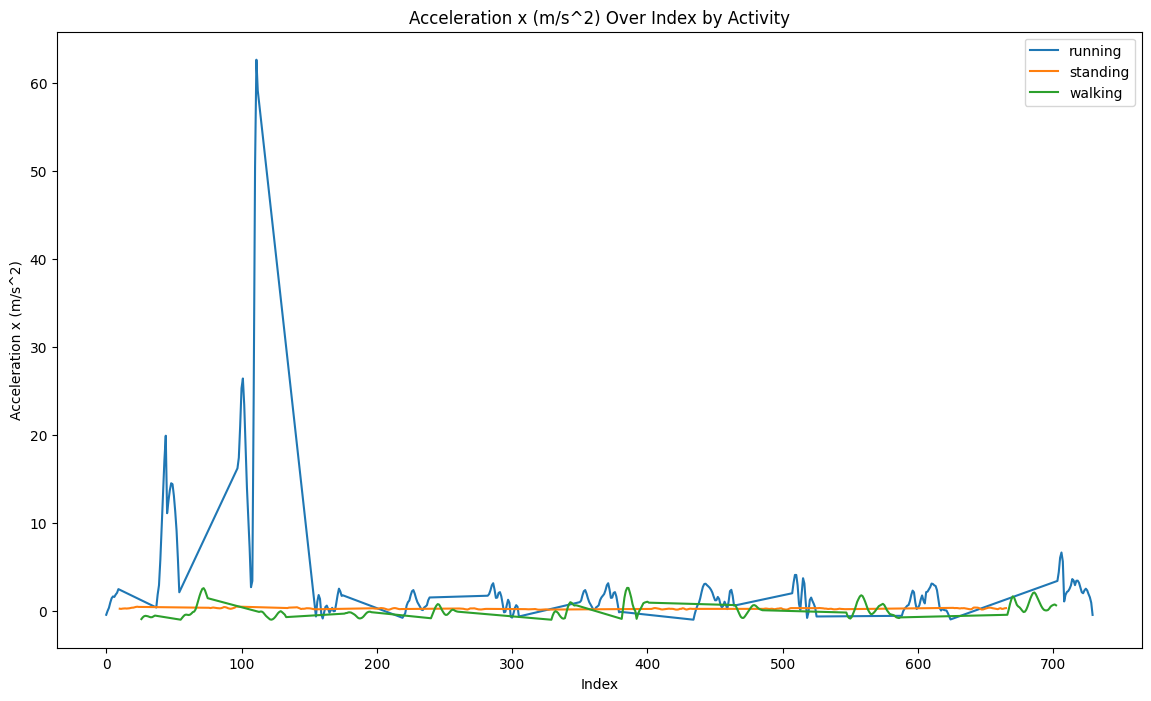

In [ ]:
plt.figure(figsize=(14, 8))
for activity in df['Activity'].unique():
    subset = df[df['Activity'] == activity]
    plt.plot(subset.index, subset['Acceleration x (m/s^2)'], label=activity)
plt.title('Acceleration x (m/s^2) Over Index by Activity')
plt.xlabel('Index')
plt.ylabel('Acceleration x (m/s^2)')
plt.legend()
plt.show()

## Relationship between 'Acceleration x' and 'Acceleration y' colored by 'Activity'

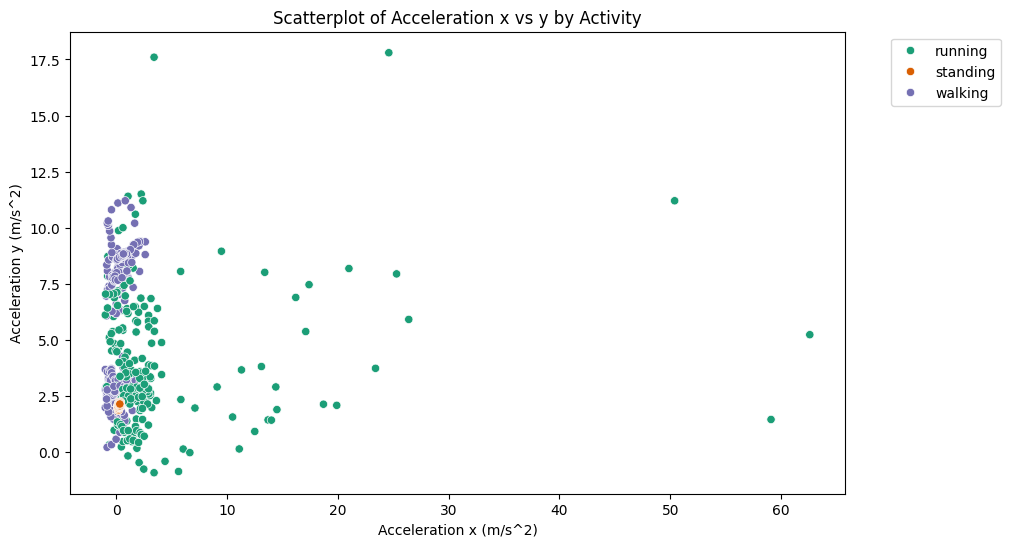

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Acceleration x (m/s^2)', y='Acceleration y (m/s^2)', hue='Activity', palette='Dark2', data=df)
plt.title('Scatterplot of Acceleration x vs y by Activity')
plt.xlabel('Acceleration x (m/s^2)')
plt.ylabel('Acceleration y (m/s^2)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Visualizing data using t-SNE


In [ ]:
x_for_tsne = df.drop(['Activity'], axis = 1)
tsne = TSNE(n_components=2, random_state=0, n_iter=1000).fit_transform(x_for_tsne)

In [ ]:
tsne

array([[ 5.366165 , -6.915058 ],
       [10.3655405, -0.5667383],
       [11.838432 ,  1.4326955],
       ...,
       [14.539313 , 11.296959 ],
       [ 4.4528403, 15.577013 ],
       [ 1.3075758, 14.281771 ]], dtype=float32)

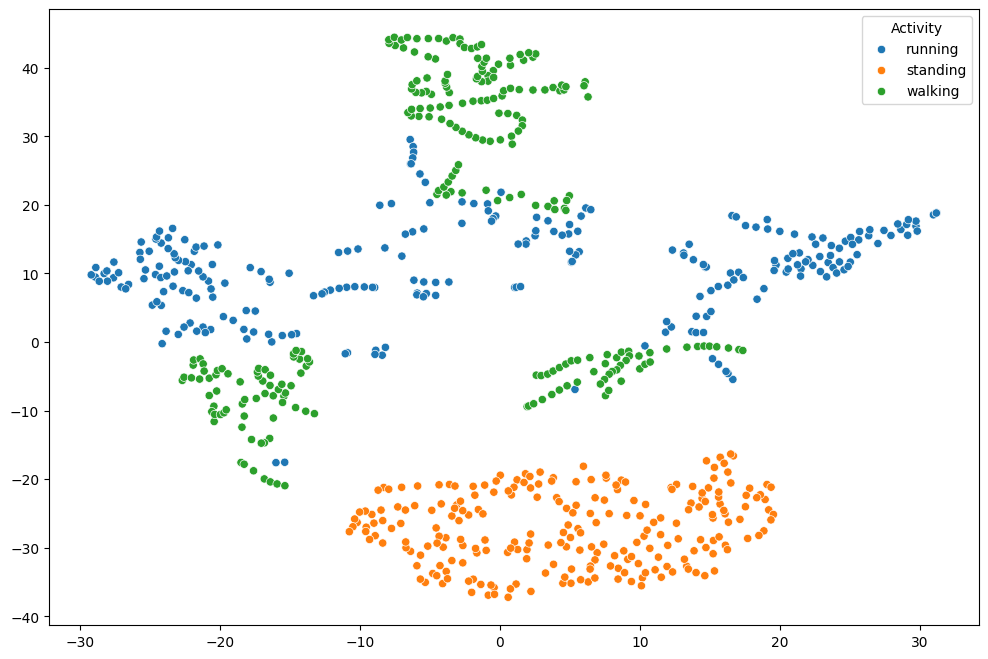

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = tsne[:, 0], y = tsne[:, 1], hue = df['Activity'])
plt.show()

## Visualizing data using PCA

In [ ]:
x_for_pca = df.drop(['Activity'], axis = 1)
pca = PCA(n_components=2, random_state=0).fit_transform(x_for_pca)

In [ ]:
pca

array([[-0.49942202, -2.09353844],
       [ 1.06075454, -2.52599477],
       [ 2.14163826, -2.9225855 ],
       ...,
       [ 6.8826202 ,  0.29115813],
       [ 2.53134142,  0.92542746],
       [-0.80197045,  0.15621108]])

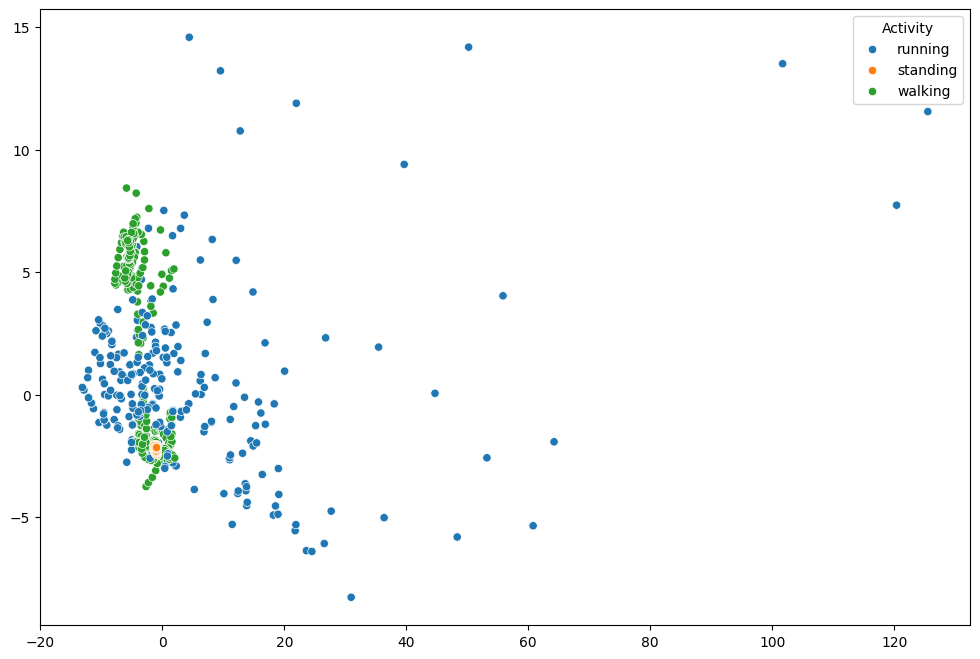

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = pca[:, 0], y = pca[:, 1], hue = df['Activity'])
plt.show()